# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [26]:
import pandas as pd 

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [27]:


pd.get_dummies(df_titanic["embarked"])

df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew"
})
df_titanic = df_titanic[df_titanic["type"] == "passenger"]


jointDist = pd.crosstab(df_titanic["class"],df_titanic["embarked"],normalize=True)

print(jointDist)



embarked         B         C         Q         S
class                                           
1st       0.002278  0.108580  0.002278  0.132878
2nd       0.004556  0.019742  0.005315  0.186029
3rd       0.000000  0.077449  0.085801  0.375095
embarked         B         C         Q         S
class                                           
1st       0.002278  0.108580  0.002278  0.132878
2nd       0.004556  0.019742  0.005315  0.186029
3rd       0.000000  0.077449  0.085801  0.375095


/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [28]:
condDist1 = pd.crosstab(df_titanic["class"], df_titanic["embarked"], normalize='columns')

print(condDist1)

condDist2 = pd.crosstab(df_titanic["class"], df_titanic["embarked"], normalize='index')

print(condDist2)


embarked         B         C         Q         S
class                                           
1st       0.333333  0.527675  0.024390  0.191466
2nd       0.666667  0.095941  0.056911  0.268053
3rd       0.000000  0.376384  0.918699  0.540481
embarked         B         C         Q         S
class                                           
1st       0.009259  0.441358  0.009259  0.540123
2nd       0.021127  0.091549  0.024648  0.862676
3rd       0.000000  0.143865  0.159379  0.696756
embarked         B         C         Q         S
class                                           
1st       0.333333  0.527675  0.024390  0.191466
2nd       0.666667  0.095941  0.056911  0.268053
3rd       0.000000  0.376384  0.918699  0.540481
embarked         B         C         Q         S
class                                           
1st       0.009259  0.441358  0.009259  0.540123
2nd       0.021127  0.091549  0.024648  0.862676
3rd       0.000000  0.143865  0.159379  0.696756


/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


69.7% of passangers that were 3rd class embarked from Southampton

Southampton had 54% of their passangers embarking be in the 3rd class

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

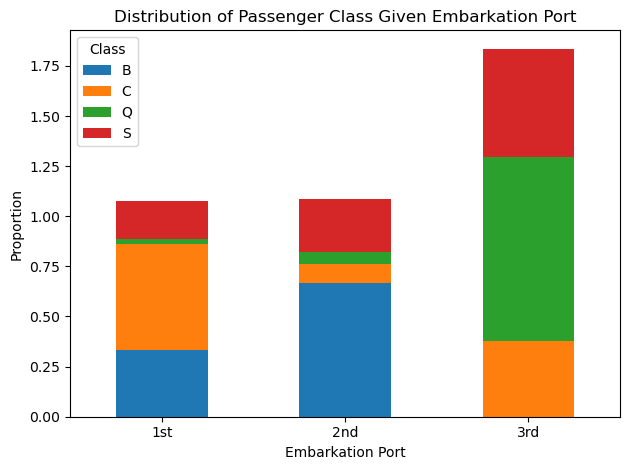

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


In [30]:
import matplotlib.pyplot as plt

# Plotting the conditional distribution of class given where they embarked
condDist1.plot(kind='bar', stacked=True)

# Adding labels and title
plt.title("Distribution of Passenger Class Given Embarkation Port")
plt.xlabel("Embarkation Port")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.legend(title="Class")

# Show the plot
plt.tight_layout()
plt.show()
